In [115]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import regex as re

In [69]:
import sys
!{sys.executable} -m pip install regex

    100% |████████████████████████████████| 645kB 11.1MB/s ta 0:00:01
  Running setup.py install for regex ... done


In [3]:
pd.read_csv('classEx.alder.par', sep='\#')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,genotypename: classEx.geno,file with genotype information
0,snpname: classEx.snp,file with snp information
1,indivname: classEx.ind,file with individual information
2,admixpop: ASW,name of admixed population
3,refpops: YRI;CEU,name of reference (ancestral) population (sep...
4,checkmap: NO,None


In [29]:
snp = pd.read_csv('classEx.snp', sep='\t', names=['snp_name', 'chr_number', '0', 'number'])
pop_list = pd.read_csv('classEx.pop.list', names=['region'])
ind = pd.read_csv('classEx.ind', sep='\t', names=['ind', 'sex', 'region'])
fam = pd.read_csv('classEx.fam', sep='\ ', names = ['n','m','m','m','m','m','m','ind','1','22','1or2','2'])[['ind','1','1or2','2']]
# bim = pd.read_csv('classEx.bim', sep='\t')
geno = pd.read_csv('classEx.geno', sep='\t', names=['geno'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
ind_fam_df = ind.merge(fam, left_on='ind', right_on='ind')
ind_fam_df.head()

,ind,sex,region,1,1or2,2
0,NA19625,F,ASW,0,2,1
1,NA19700,M,ASW,0,1,1
2,NA19701,F,ASW,0,2,1
3,NA19703,M,ASW,0,1,1
4,NA19704,F,ASW,0,2,1


In [55]:
bim = pd.read_csv('classEx.bim', sep='\s+', names = ['chr_number', 'snp_name', 'cM','nan', 'number', '1'])
del bim['nan']
bim[bim["chr_number"]==17]["cM"].describe()

count    268.000000
mean       0.419523
std        0.264104
min        0.002055
25%        0.145036
50%        0.431677
75%        0.683570
max        0.811309
Name: cM, dtype: float64

In [42]:
snp_bim_df = snp.merge(bim, left_on='snp_name', right_on='snp_name')
del snp_bim_df['number_y']
del snp_bim_df['chr_number_y']
snp_bim_df

,snp_name,chr_number_x,0,number_x,loc?,1
0,rs7417994,1,0.0,863689,0.008637,2
1,rs9442391,1,0.0,984302,0.009843,2
2,rs72631898,1,0.0,1116553,0.011166,2
3,rs80322353,1,0.0,1162541,0.011625,2
4,rs1889678,1,0.0,1793003,0.017930,2
5,rs7527871,1,0.0,2281726,0.022817,2
6,rs2842929,1,0.0,2866972,0.028670,2
7,rs12040299,1,0.0,2951041,0.029510,2
8,rs11804428,1,0.0,3543690,0.035437,2
9,rs2275827,1,0.0,3746585,0.037466,2


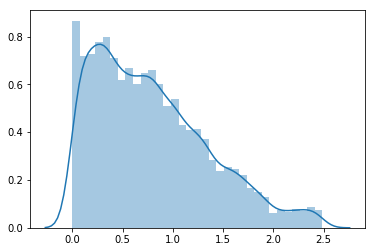

In [56]:
bim['cM'][1]
loc_list = [float(bim['cM'][n]) for n in range(len(bim['cM']))]
sns.distplot(loc_list)

In [81]:
geno

,geno
0,0101120110010110120201222211221110110111222221...
1,1000100000000101100100122101211011100001011111...
2,0000100000000000000010000000000001000012011000...
3,1000101002000000010000000000010101000000100100...
4,0112111000211211211121121121221211121112122222...
5,0000010000000000200000000001011110011000001000...
6,1000200112001002011001121001111100100200012212...
7,0100000121100010000200011121100100010101111120...
8,1121100000010010000000100001010000020101000000...
9,0010000110000000000110001110001000100010001001...


In [87]:
len(re.findall('0', geno.iloc[0]['geno'])) / 478
len(re.findall('1', geno.iloc[0]['geno'])) / 478
len(re.findall('2', geno.iloc[0]['geno'])) / 478


1.0

In [90]:
freq0 = []
freq1 = []
freq2 = []

for g in geno['geno']:
    freq0.append(len(re.findall('0', g)) / 478)
    freq1.append(len(re.findall('1', g)) / 478)
    freq2.append(len(re.findall('2', g)) / 478)
    
geno['freq0'] = freq0
geno['freq1'] = freq1
geno['freq2'] = freq2
geno

,geno,freq0,freq1,freq2
0,0101120110010110120201222211221110110111222221...,0.123431,0.217573,0.658996
1,1000100000000101100100122101211011100001011111...,0.274059,0.449791,0.276151
2,0000100000000000000010000000000001000012011000...,0.663180,0.257322,0.079498
3,1000101002000000010000000000010101000000100100...,0.746862,0.223849,0.029289
4,0112111000211211211121121121221211121112122222...,0.087866,0.236402,0.675732
5,0000010000000000200000000001011110011000001000...,0.671548,0.282427,0.046025
6,1000200112001002011001121001111100100200012212...,0.424686,0.416318,0.158996
7,0100000121100010000200011121100100010101111120...,0.598326,0.320084,0.081590
8,1121100000010010000000100001010000020101000000...,0.826360,0.150628,0.023013
9,0010000110000000000110001110001000100010001001...,0.673640,0.297071,0.029289


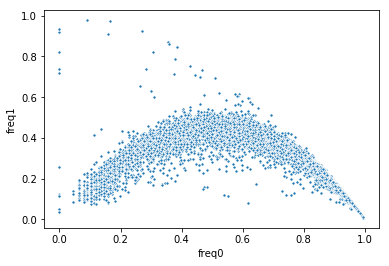

In [103]:
sns.scatterplot((geno['freq0'] ** 0.5), geno['freq1'], s = 10);

In [107]:
af = (geno["freq1"] + 2 * geno["freq2"]) / 2
geno['af'] = af
geno

,geno,freq0,freq1,freq2,af
0,0101120110010110120201222211221110110111222221...,0.123431,0.217573,0.658996,0.767782
1,1000100000000101100100122101211011100001011111...,0.274059,0.449791,0.276151,0.501046
2,0000100000000000000010000000000001000012011000...,0.663180,0.257322,0.079498,0.208159
3,1000101002000000010000000000010101000000100100...,0.746862,0.223849,0.029289,0.141213
4,0112111000211211211121121121221211121112122222...,0.087866,0.236402,0.675732,0.793933
5,0000010000000000200000000001011110011000001000...,0.671548,0.282427,0.046025,0.187238
6,1000200112001002011001121001111100100200012212...,0.424686,0.416318,0.158996,0.367155
7,0100000121100010000200011121100100010101111120...,0.598326,0.320084,0.081590,0.241632
8,1121100000010010000000100001010000020101000000...,0.826360,0.150628,0.023013,0.098326
9,0010000110000000000110001110001000100010001001...,0.673640,0.297071,0.029289,0.177824


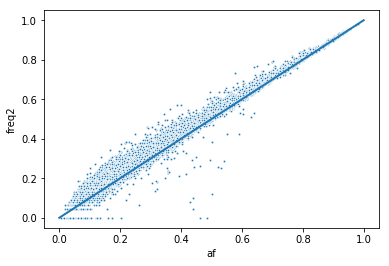

In [118]:
sns.scatterplot(geno['af'], (geno['freq2'] ** 0.5), s=7)
plt.plot([0,1], [0,1], linewidth=2);

In [126]:
len(ind[ind['region'] == 'TSI'])

107